In [1]:
####pythons et maths 020421 ####

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)


In [4]:
del df_iris['sepal width (cm)']
del df_iris['petal width (cm)']



In [5]:
df_iris.columns = ("sepal", "petal")

In [6]:
X = np.array(df_iris)

Points au hasard centres de gravités qui doivent être déplacés eventuellement pour être plus pertinents. 
On commence par initialiser aléatoriement qq points. 

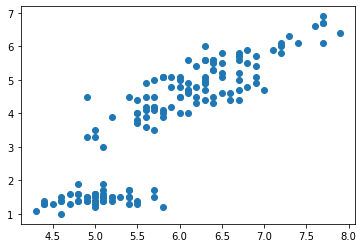

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
import random
initialisation_centroids = random.sample(range(0, len(df_iris)),3)

Affecter des points à des centres de gravité le plus proche 

In [9]:
centroides = []
for i in initialisation_centroids:
        centroides.append(df_iris.loc[i])
centroides

[sepal    7.1
 petal    5.9
 Name: 102, dtype: float64,
 sepal    5.4
 petal    1.5
 Name: 31, dtype: float64,
 sepal    6.4
 petal    4.3
 Name: 74, dtype: float64]

In [10]:
centroides = np.array(centroides)

On crée la liste des distances entre les données au centres de gravité

In [11]:
def distance_euclidienne(x1,x2):
    return(sum((x1-x2)**2)**0.5)
    
    

        

In [12]:
def proche_centroides(centroides, data):
    centroides_attribues = []
    for i in data :
      distance = []
      for j in centroides:
         distance.append(distance_euclidienne(i,j))
      centroides_attribues.append(np.argmin(distance))
    return centroides_attribues

In [13]:
nouveaux_centroides = proche_centroides(centroides,X)

On déplace le centre cluster vers la moyenne de ces coordonnées 

In [14]:

def calcul_centroides(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns = ["cluster"])])
    for c in set(new_df["cluster"]):
        #a partir du cluster actu, réaliser le calcul du nv centroïde
        cluster_actuel =  new_df[new_df["cluster"] == c][new_df.columns[:-1]]
        moyenne_cluster = cluster_actuel.mean(axis=0)
        new_centroids.append(moyenne_cluster)
    return new_centroids


C:\Users\Tanguy RUAULT\anaconda3\lib\site-packages\numpy\ma\core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size

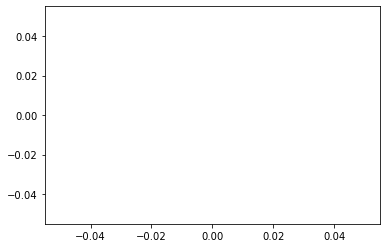

In [15]:
# définir les itérations
for i in range (10): 
    nouveaux_centroides = proche_centroides(centroides, X)
    centroides = calcul_centroides(nouveaux_centroides, X)
    plt.figure()
    plt.scatter(np.array(centroides)[:,0], np.array(centroides)[:,1], color = "black")
    plt.scatter(X[:,0], [X,1], alpha = 0)
    

répéter ce processus jusqu'à ce que les centres de gravité ne bougent plus